# Downloading weather data
> Simple scripts for downloading weather data

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [visualisation]

In this notebook, I'll write a small illustration on downloading historical weather data using [forceast.io](http://forecast.io/#/f/45.6453,-122.2508). I'll also illustrate handling timezone issues when using such time series data. I am going to use python-forecastio, which is a Python wrapper around forecast.io service. I'll be downloading hourly weather data for Austin, Texas.

In [1]:
import datetime
import pandas as pd
import forecastio
import getpass

In [5]:
# Enter your API here
api_key = getpass.getpass()

········


In [7]:
len(api_key)

32

Austin's Latitude and longitude

In [8]:
lat = 30.25
lng = -97.25

Let us see the forecast for 1 Jan 2015

In [9]:
date = datetime.datetime(2015,1,1)

In [10]:
forecast = forecastio.load_forecast(api_key, lat, lng, time=date, units="us")

In [11]:
forecast

In [12]:
hourly = forecast.hourly()

In [16]:
hourly.data

Extracting data for a single hour.

In [18]:
hourly.data[0].d

{u'apparentTemperature': 32.57,
 u'dewPoint': 33.39,
 u'humidity': 0.79,
 u'icon': u'clear-night',
 u'precipIntensity': 0,
 u'precipProbability': 0,
 u'pressure': 1032.61,
 u'summary': u'Clear',
 u'temperature': 39.46,
 u'time': 1420005600,
 u'visibility': 10,
 u'windBearing': 21,
 u'windSpeed': 10.95}

Let us say that we want to use the temperature and humidity only.

In [19]:
attributes = ["temperature", "humidity"]

In [20]:
times = []
data = {}
for attr in attributes:
    data[attr] = []

Now, let us download hourly data for 30 days staring January 1 this year.

In [21]:
start = datetime.datetime(2015, 1, 1)
for offset in range(1, 60):
    forecast = forecastio.load_forecast(api_key, lat, lng, time=start+datetime.timedelta(offset), units="us")
    h = forecast.hourly()
    d = h.data
    for p in d:
        times.append(p.time)
        for attr in attributes:
            data[attr].append(p.d[attr])

Now, let us create a Pandas data frame for this time series data.

In [22]:
df = pd.DataFrame(data, index=times)

In [23]:
df.head()

,humidity,temperature
2015-01-01 11:30:00,0.73,38.74
2015-01-01 12:30:00,0.74,38.56
2015-01-01 13:30:00,0.75,38.56
2015-01-01 14:30:00,0.79,37.97
2015-01-01 15:30:00,0.80,37.78


Now, we need to fix the timezone. 

In [24]:
df = df.tz_localize("Asia/Kolkata").tz_convert("US/Central")

In [25]:
df.head()

,humidity,temperature
2015-01-01 00:00:00-06:00,0.73,38.74
2015-01-01 01:00:00-06:00,0.74,38.56
2015-01-01 02:00:00-06:00,0.75,38.56
2015-01-01 03:00:00-06:00,0.79,37.97
2015-01-01 04:00:00-06:00,0.80,37.78


I'll now export this file to a CSV to use it for following demonstrations on aggregations on time series.

In [26]:
df.to_csv("weather.csv")

A quick validation of our downloaded data.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

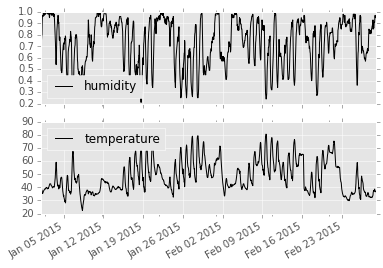

In [29]:
df.plot(subplots=True);